In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [2]:
complete = pd.read_csv('data/complete.csv')
X, y = complete.iloc[:, :-1], complete['popularity']

LASSO REGRESSION

In [3]:
alphas_to_try = [0.01, 0.1, 1, 10, 100]
rmse_per_fold = []

In [4]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [5]:
rmse_dict = {f'Fold {i+1}': [] for i in range(n_splits)}

for alpha in alphas_to_try:
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        
        y_pred = lasso.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        rmse_dict[f'Fold {fold}'].append(rmse)

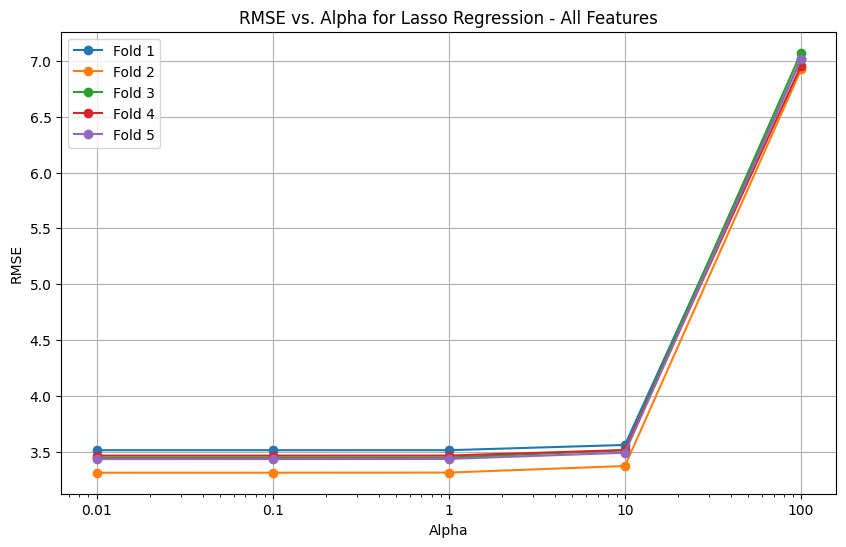

In [6]:
plt.figure(figsize=(10, 6))
for fold, rmse_values in rmse_dict.items():
    plt.plot(alphas_to_try, rmse_values, marker='o', linestyle='-', label=fold)

plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs. Alpha for Lasso Regression - All Features")
plt.xscale('log')  
plt.xticks(alphas_to_try, alphas_to_try)
plt.legend()
plt.grid(True)
plt.show()


LINEAR REGRESSION

In [7]:
rmse_per_fold2 = []
rmse_dict2 = {f'Fold {i+1}': [] for i in range(n_splits)}

In [8]:
rmse_dict2 = {f'Fold {i+1}': [] for i in range(n_splits)}

for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    y_pred = lin_reg.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    rmse_dict2[f'Fold {fold}'].append(rmse)

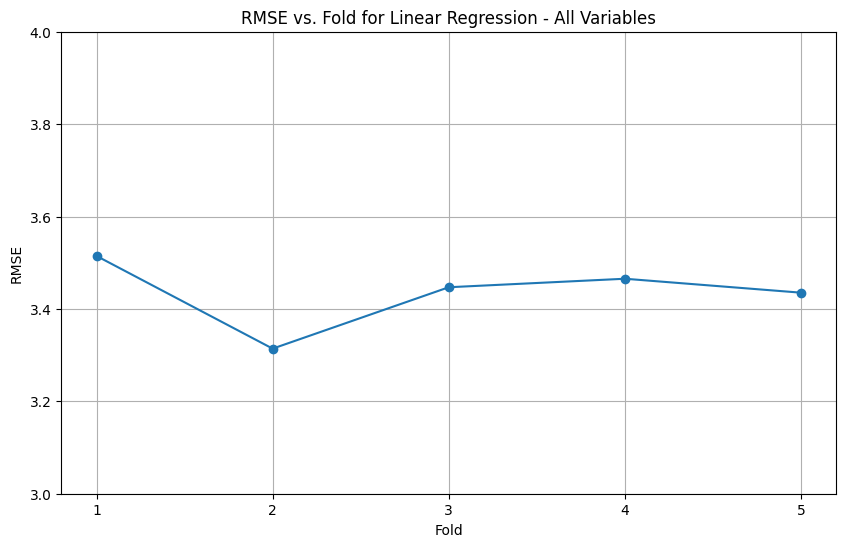

In [10]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), rmse_dict2.values(), marker='o', linestyle='-')
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.title("RMSE vs. Fold for Linear Regression - All Variables")
plt.xticks(range(1, n_splits + 1))
plt.grid(True)
plt.ylim((3, 4))
plt.show()
